## Obtaining the Efficient Frontier - Part I

We are in the middle of a set of 3 Python lectures that will help you reproduce the Markowitz Efficient Frontier. Let’s split this exercise into 3 parts and cover the first part here. 

Begin by extracting data for Walmart and Facebook from the 1st of January 2014 until today.

In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT','FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a,data_source = 'yahoo', start = '2014-1-1')['Adj Close']

pf_data.head()

,WMT,FB
Date,,
2014-01-02,66.466904,54.709999
2014-01-03,66.247871,54.560001
2014-01-06,65.877281,57.200001
2014-01-07,66.079414,57.919998
2014-01-08,65.557198,58.230000


Do a quick check of the data, normalize it to 100, and see how the 2 stocks were doing during the given timeframe. 

<AxesSubplot:xlabel='Date'>

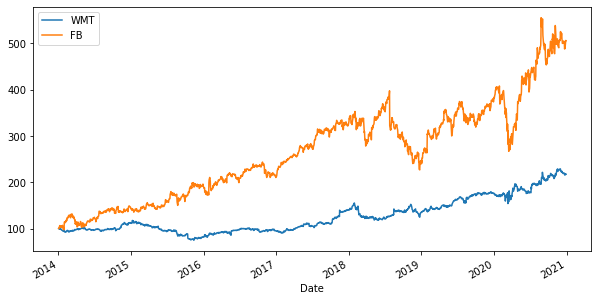

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

Calculate their logarithmic returns.

In [7]:
log_returns = np.log(pf_data / pf_data.shift(1))
log_returns.mean() * 250

WMT    0.110152
FB     0.230281
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB
WMT,0.043428,0.015502
FB,0.015502,0.104931


In [9]:
log_returns.corr()

,WMT,FB
WMT,1.000000,0.229648
FB,0.229648,1.000000


Create a variable that carries the number of assets in your portfolio.

In [11]:
num_assets = len(assets)

The portfolio need not be equally weighted. So, create a variable, called “weights”. Let it contain as many randomly generated values as there are assets in your portfolio. Don’t forget these values should be neither smaller than 0 nor equal or greater than 1! <br />

*Hint: There is a specific NumPy function that allows you to generate such values. It is the one we used in the lecture - NumPy.random.random().*

In [13]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights


array([0.42403705, 0.57596295])

Sum the obtained values to obtain 1 – summing up the weights to 100%!

In [16]:
sum(weights)

1.0

*****

Save this document! The next 2 exercises will build on the code you just created!